In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle
import re
import string
import seaborn as sns

In [2]:
def tokenize(s):
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    out = regex.sub(' ', s).split()
    return out

def fit_logistic(x, y):
    y = y.values
    model = LogisticRegression(C=4, dual=True)
    return model.fit(x, y)

In [3]:
PATH = "archive/labeled_data.csv"

In [5]:
df = pd.read_csv(PATH)
df.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)


In [6]:
cls_names =[" hate speech","offensive language","neither"]


In [7]:
 tfidfvectorizer = TfidfVectorizer(ngram_range=(1, 2),
                                    tokenizer=tokenize,
                                    min_df=3,
                                    max_df=0.9,
                                    strip_accents='unicode',
                                    use_idf=1,
                                    smooth_idf=True,
                                    sublinear_tf=1)


In [8]:
df

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


C:\Users\Ranjan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

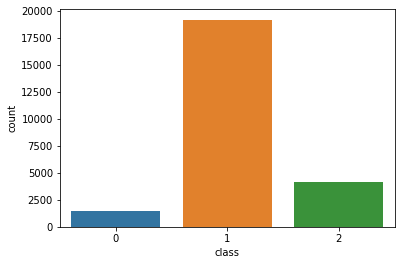

In [10]:
sns.countplot('class',data=df)